In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [2]:
data = pd.read_csv("data2d.csv")
data

,input,outputx,outputy
0,-6.283185,181.307290,-32.267658
1,-6.273185,197.934269,-35.201388
2,-6.263185,169.278973,-36.276383
3,-6.253185,225.736886,-36.010951
4,-6.243185,230.960018,-34.003974
...,...,...,...
1252,6.236815,267.021407,41.044033
1253,6.246815,261.117094,40.730477
1254,6.256815,261.856840,41.651335
1255,6.266815,274.727379,38.794660


In [3]:
inputvals = data.input
outputvals = data.drop(columns=['input'])

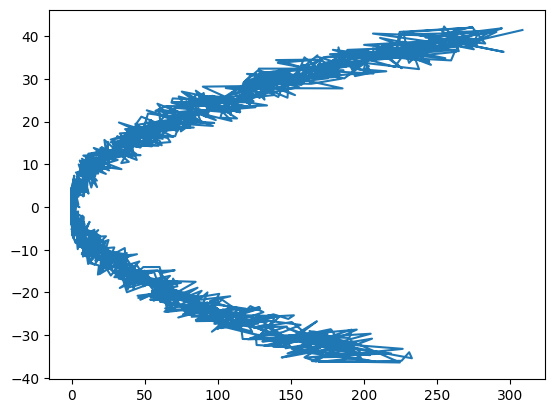

In [4]:
plt.plot(outputvals.outputx,outputvals.outputy)

In [5]:
print(inputvals.shape)
print(outputvals.shape)

(1257,)
(1257, 2)


In [6]:
model = tf.keras.Sequential([
    # tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(100,activation="leaky_relu"),
    tf.keras.layers.Dense(2,activation="leaky_relu"),
    # tf.keras.layers.Softmax()
])

In [7]:
model.compile(
    optimizer = "adam",
    # loss = tf.keras.losses.SparseCategoricalCrossentropy,
    loss = tf.keras.losses.MeanSquaredError,
    metrics = ['accuracy','precision']
)

In [8]:
model.fit(inputvals,outputvals,epochs = 1000)

Epoch 1/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8549 - loss: 5583.0347 - precision: 0.9756   
Epoch 2/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9295 - loss: 877.6508 - precision: 1.0000
Epoch 3/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9407 - loss: 524.7072 - precision: 1.0000 
Epoch 4/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9365 - loss: 437.9974 - precision: 1.0000 
Epoch 5/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9399 - loss: 388.6895 - precision: 1.0000
Epoch 6/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9469 - loss: 299.6268 - precision: 1.0000
Epoch 7/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9206 - loss: 243.3245 - precision: 1.0000
Epoch 8/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8973 - loss: 208.5022 - precision: 1.0000
Epoch 9/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8775 - loss: 166.1359 - precision: 1.0000 
Epoch 10/1000
40/40 ━

In [9]:
# inputvals = np.arange(0,2*pi,0.01).tolist()
# inputvals = pd.DataFrame(inputvals)
# inputvals = outputvals.outputy
# print(type(inputvals))
predictor = model.predict(inputvals)
print(predictor)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[208.00114  -36.9602  ]
 [207.37552  -36.876247]
 [206.75069  -36.802746]
 ...
 [281.41852   40.240818]
 [282.17215   40.307255]
 [282.92578   40.37366 ]]


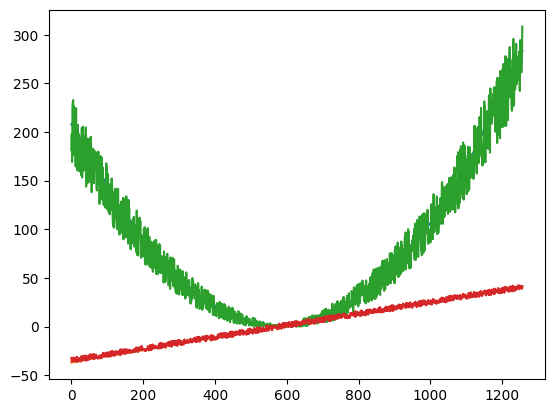

In [10]:
plt.plot(predictor)
plt.plot(outputvals)

In [11]:
predx = []
predy = []
for i,j in predictor:
    predx.append(i)
    predy.append(j)

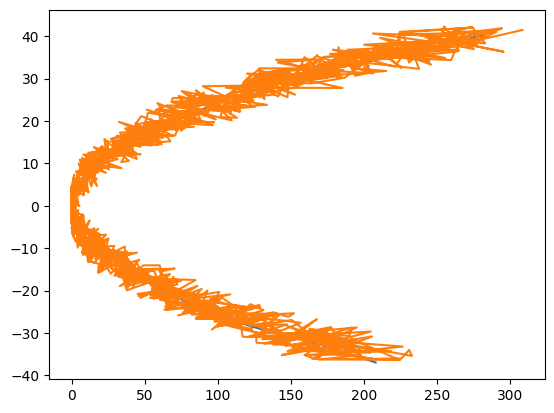

In [12]:
plt.plot(predx,predy)
plt.plot(outputvals.outputx,outputvals.outputy)